<a href="https://colab.research.google.com/github/Eakta08/Sentiment-Analysis-of-Spotify-App-Reviews/blob/main/ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Spotify App Review using ML model

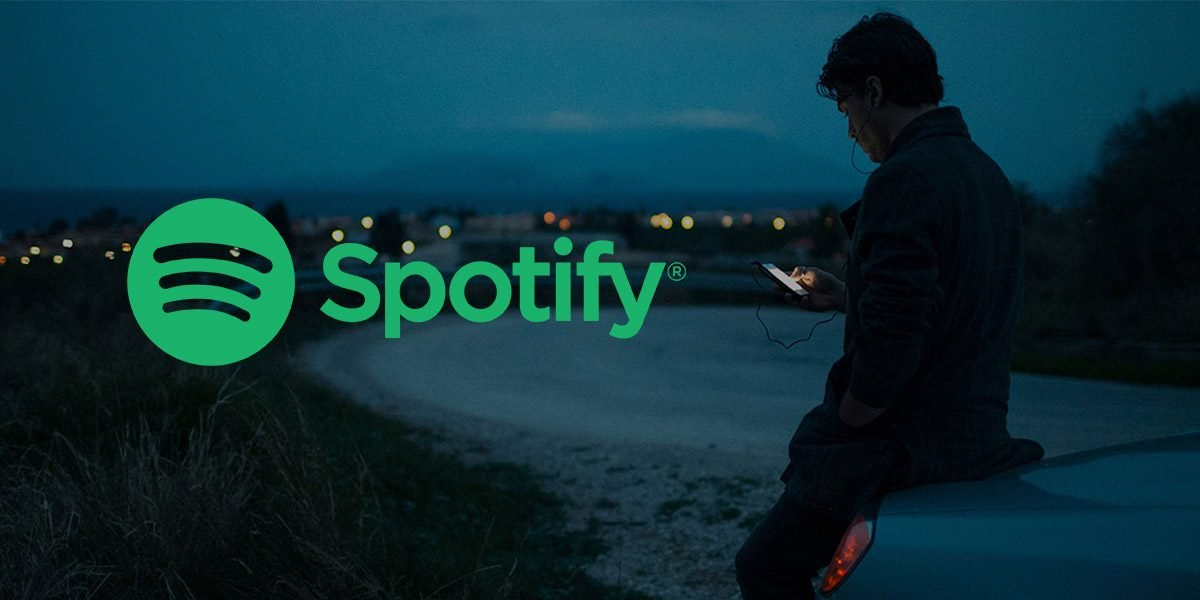

***

## Few Installations

In [1]:
pip install contractions wordcloud

In [2]:
import nltk
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [3]:
!pip install xgboost lightgbm

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import nltk
import re
import contractions
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [7]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

## Reading the dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/reviews.csv')
data.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN


In [11]:
data=data[['Review','Rating']]
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [13]:
data.nunique()

Review    61356
Rating        5
dtype: int64

In [14]:
sorted(data.Rating.unique())

[1, 2, 3, 4, 5]

# Data Preprocessing

In [15]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [16]:
data.duplicated().sum()

201

In [17]:
data=data.drop_duplicates()
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [18]:
def text_preprocessing(text):
  #lowercasing
  text=text.lower()
  #expanding contractions
  text=contractions.fix(text)
  #removing punctuations
  text=re.sub('[^a-zA-Z\d\s]','',text)
  #removing stopwords
  text=" ".join([wrd for wrd in text.split() if wrd not in stopwords])
  #spelling correction
  #text=TextBlob(text).correct()
  #lemmatization
  text=" ".join([lemma.lemmatize(wrd) for wrd in text.split()])
  return text

In [19]:
data.Review=[text_preprocessing(sen) for sen in data.Review]

In [20]:
#1,2->negative
data.loc[data['Rating']<3,'label'] = 0

#3->neutral(i.e 1)
data.loc[data['Rating']==3,'label'] = 1

#4,5->positive(i.e 2)
data.loc[data['Rating']>3,'label'] = 2

In [21]:
data

,Review,Rating,label
0,great music service audio high quality app eas...,5,2.0
1,please ignore previous negative rating app sup...,5,2.0
2,popup get best spotify experience android 12 a...,4,2.0
3,really buggy terrible use recently,1,0.0
4,dear spotify get song put playlist shuffle play,1,0.0
...,...,...,...
61589,even though communicated lyric feature availab...,1,0.0
61590,use sooo good back downloaded free version cou...,1,0.0
61591,app would good taking device start comp spotif...,2,0.0
61592,app good hard navigate let play song click pla...,2,0.0


## Data Visualization

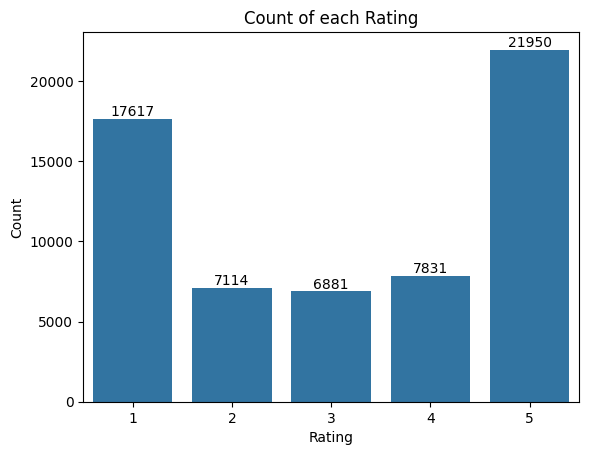

In [22]:
rate=data.Rating.value_counts()
ax=sns.barplot(x=rate.index,y=rate.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

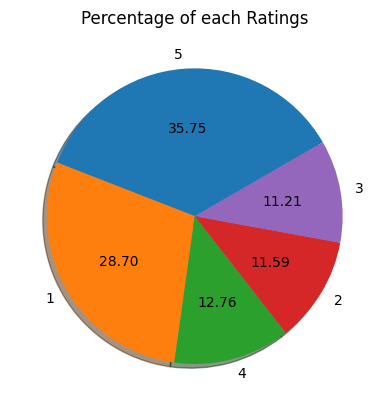

In [23]:
plt.pie(x=rate,autopct="%.2f",labels=rate.index,startangle=30,
       shadow=True)
plt.title('Percentage of each Ratings')
plt.show()

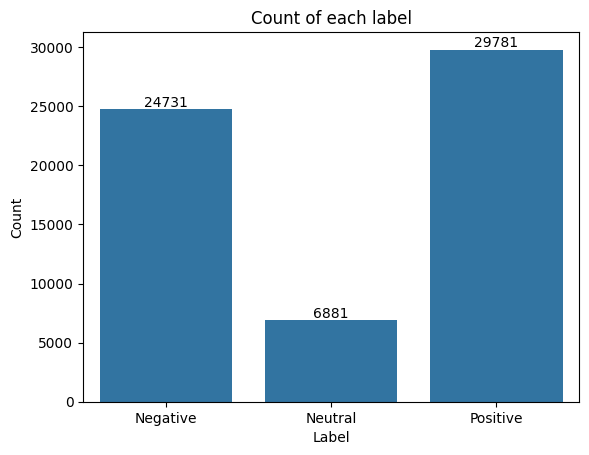

In [24]:
lab=data.label.value_counts()
ax=sns.barplot(x=lab.index,y=lab.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('Count of each label')
plt.show()

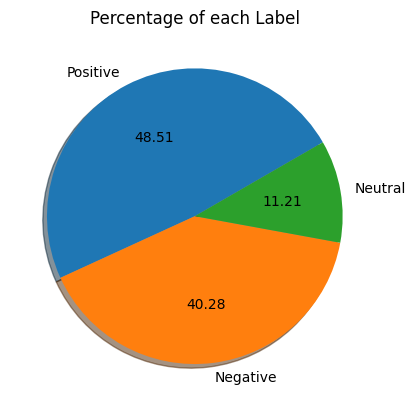

In [25]:
plt.pie(x=lab,autopct="%.2f",labels=['Positive','Negative','Neutral'],startangle=30,
       shadow=True)
plt.title('Percentage of each Label')
plt.show()

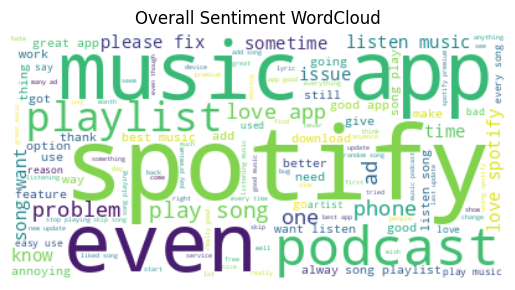

In [26]:
text=" ".join([sen for sen in data.Review])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Sentiment WordCloud")
plt.show()

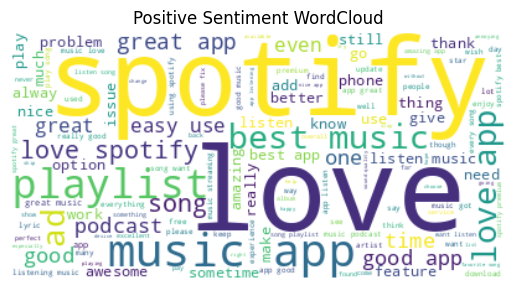

In [27]:
positive=' '.join(word for word in data['Review'][data['label']==2].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment WordCloud")
plt.show()

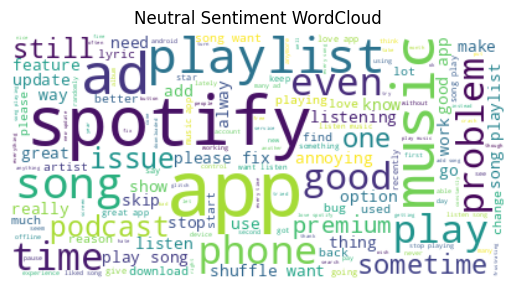

In [28]:
neutral=' '.join(word for word in data['Review'][data['label']==1].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(neutral)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Sentiment WordCloud")
plt.show()

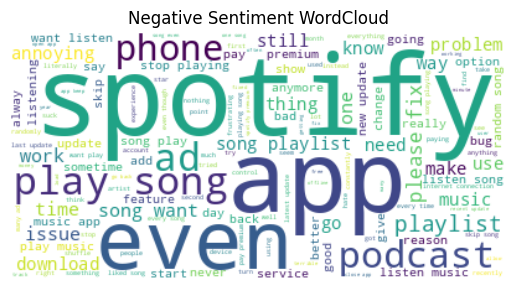

In [29]:
negative=' '.join(word for word in data['Review'][data['label']==0].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment WordCloud")
plt.show()

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data['Review']
y = data.label

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)

In [33]:
X_train

29633                      banging app getting better time
20136               love app alot using year app wonderful
57456       fixed rating since fixed issue previous update
50545    longer connects kenwood spotify app car blueto...
30302                       listen spotify daily hour year
                               ...                        
12167    amazing app support team reply fast take le 2 ...
57390    good use time one thing repeat button really b...
14206                         love free music ad hard deal
56287    spotify support misinformation pay quit paid s...
38604    new update broke music controller click music ...
Name: Review, Length: 42975, dtype: object

In [34]:
y_train

29633    2.0
20136    2.0
57456    2.0
50545    0.0
30302    2.0
        ... 
12167    2.0
57390    2.0
14206    2.0
56287    0.0
38604    1.0
Name: label, Length: 42975, dtype: float64

## Model Selection

In [35]:
acc=pd.DataFrame({'Model':[],'Training Accuracy':[],'Testing Accuracy':[],'Cross validation Score':[]})
acc

,Model,Training Accuracy,Testing Accuracy,Cross validation Score


In [36]:
def report(model,model_name,i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_pred)
    cross_val=cross_val_score(model,X_train,y_train,cv=5).mean()
    print('-'*70)
    print(f'Classification Report: \n{classification_report(y_pred,y_test)}')
    print('-'*70)
    print(f"Training Accuracy Score = {train_acc}")
    print(f"Testing Accuracy Score = {test_acc}")
    print(f'Cross Validation Score = {cross_val}')
    print('-'*70)
    print("Confusion Matrix:")
    conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                               columns = ['Predicted : Neg', 'Predicted : Neu',  'Predicted : Pos'],
                               index =['Actual : Neg', 'Actual : Neu', 'Actual : Pos'])
    plt.figure(figsize = (8, 5))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.show()
    print('-'*70)
    acc.loc[i]=[model_name,train_acc, test_acc,cross_val]

- ### Logistic Regression

In [37]:
final_lr=Pipeline([("Vect",TfidfVectorizer()),
                    ("model",LogisticRegression(solver='lbfgs', multi_class='multinomial'))])

In [38]:
final_lr.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', LogisticRegression(multi_class='multinomial'))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80      8798
         1.0       0.06      0.37      0.10       333
         2.0       0.87      0.84      0.86      9287

    accuracy                           0.78     18418
   macro avg       0.60      0.65      0.59     18418
weighted avg       0.86      0.78      0.82     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.8179173938336242
Testing Accuracy Score = 0.7844499945705289
Cross Validation Score = 0.7830366492146597
----------------------------------------------------------------------
Confusion Matrix:


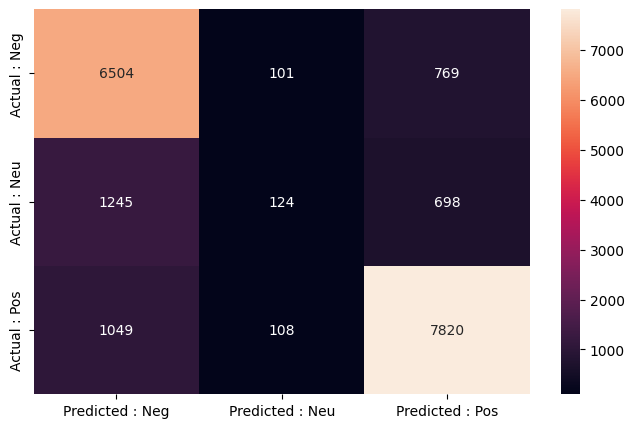

----------------------------------------------------------------------


In [39]:
report(final_lr, model_name="Logistic Regression", i=1)

- ### SVM

In [40]:
final_svm=Pipeline([("Vect",TfidfVectorizer()),
               ("model",LinearSVC())])

In [41]:
final_svm.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', LinearSVC())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      8654
         1.0       0.06      0.32      0.10       393
         2.0       0.87      0.83      0.85      9371

    accuracy                           0.77     18418
   macro avg       0.60      0.63      0.58     18418
weighted avg       0.85      0.77      0.81     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.8642931937172775
Testing Accuracy Score = 0.7740254099250733
Cross Validation Score = 0.7739616055846422
----------------------------------------------------------------------
Confusion Matrix:


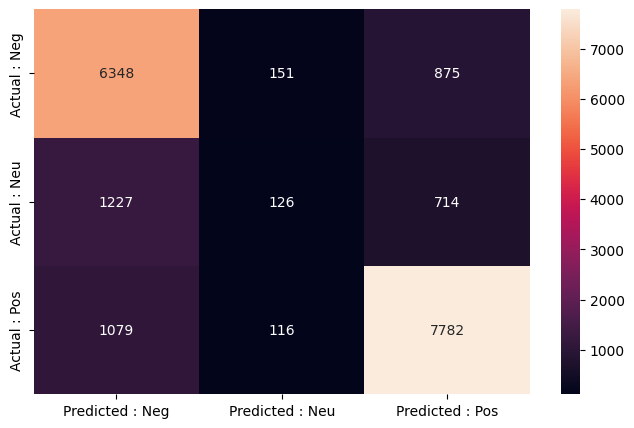

----------------------------------------------------------------------


In [42]:
report(final_svm, model_name="SVM", i=2)

- ### Decision Tree

In [43]:
final_dt=Pipeline([("Vect",TfidfVectorizer()),
               ("model",DecisionTreeClassifier(max_depth=11))])

In [44]:
final_dt.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', DecisionTreeClassifier(max_depth=11))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.89      0.60      0.72     10798
         1.0       0.02      0.23      0.04       191
         2.0       0.68      0.82      0.74      7429

    accuracy                           0.69     18418
   macro avg       0.53      0.55      0.50     18418
weighted avg       0.79      0.69      0.72     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.7167888307155322
Testing Accuracy Score = 0.6874253447714193
Cross Validation Score = 0.693216986620128
----------------------------------------------------------------------
Confusion Matrix:


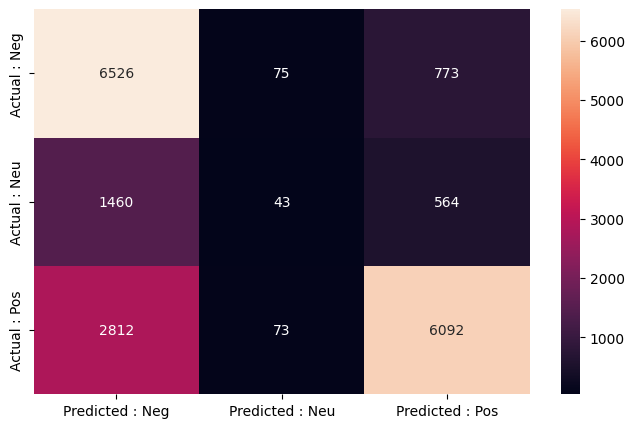

----------------------------------------------------------------------


In [45]:
report(final_dt, model_name="Decision Tree", i=3)

- ### Random Forest

In [46]:
final_rf=Pipeline([("Vect",TfidfVectorizer()),
               ("model",RandomForestClassifier(n_estimators=77, max_depth=17))])

In [47]:
final_rf.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model',
                 RandomForestClassifier(max_depth=17, n_estimators=77))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.67      6200
         1.0       0.00      0.00      0.00         0
         2.0       0.92      0.67      0.78     12218

    accuracy                           0.69     18418
   macro avg       0.51      0.47      0.48     18418
weighted avg       0.81      0.69      0.74     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.7153228621291449
Testing Accuracy Score = 0.69128026930177
Cross Validation Score = 0.698173356602676
----------------------------------------------------------------------
Confusion Matrix:


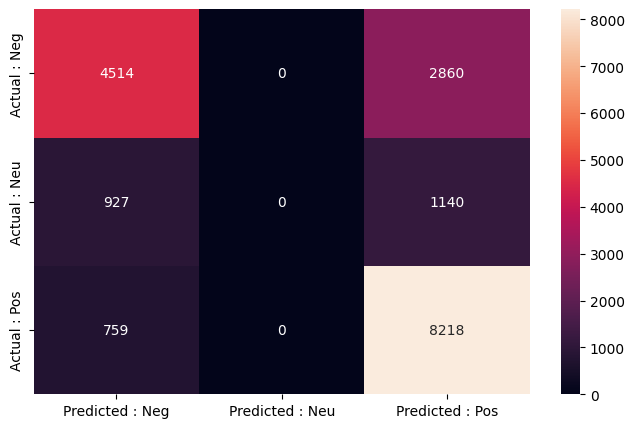

----------------------------------------------------------------------


In [48]:
report(final_rf, model_name="Random Forest", i=4)

- ### GB

In [49]:
final_gb=Pipeline([("Vect",TfidfVectorizer()),
               ("model",GradientBoostingClassifier())])

In [50]:
final_gb.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', GradientBoostingClassifier())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76      8684
         1.0       0.01      0.38      0.03        74
         2.0       0.85      0.79      0.82      9660

    accuracy                           0.75     18418
   macro avg       0.56      0.62      0.54     18418
weighted avg       0.84      0.75      0.79     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.7610471204188481
Testing Accuracy Score = 0.7475838853295689
Cross Validation Score = 0.7497847585805701
----------------------------------------------------------------------
Confusion Matrix:


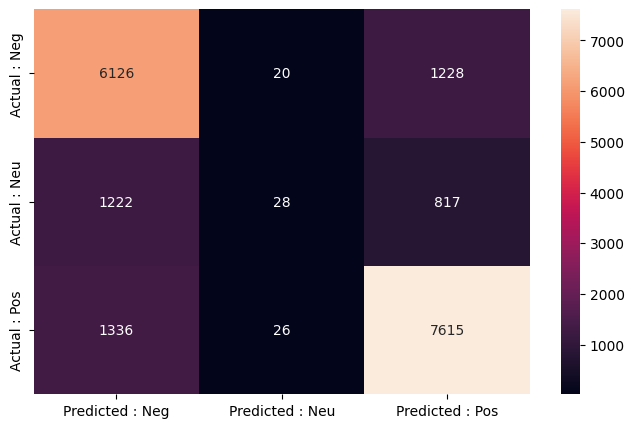

----------------------------------------------------------------------


In [51]:
report(final_gb, model_name="Gradient Boosting", i=5)

- ### SGD

In [52]:
final_sgd=Pipeline([("Vect",TfidfVectorizer()),
               ("model",SGDClassifier())])

In [53]:
final_sgd.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', SGDClassifier())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      9173
         1.0       0.00      0.00      0.00         0
         2.0       0.87      0.85      0.86      9245

    accuracy                           0.79     18418
   macro avg       0.59      0.52      0.55     18418
weighted avg       0.89      0.79      0.83     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.8027457824316463
Testing Accuracy Score = 0.7856987729395157
Cross Validation Score = 0.7862710878417685
----------------------------------------------------------------------
Confusion Matrix:


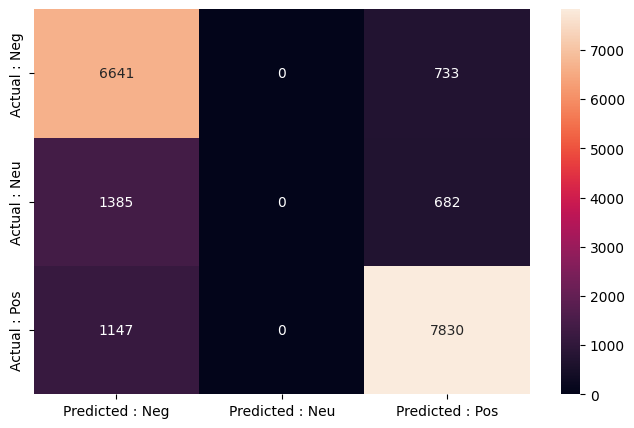

----------------------------------------------------------------------


In [54]:
report(final_sgd, model_name="SGD", i=6)

* ### XGBoost

In [55]:
final_xg=Pipeline([("Vect",TfidfVectorizer()),
               ("model",XGBClassifier())])

In [56]:
final_xg.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      8876
           1       0.04      0.36      0.07       219
           2       0.86      0.83      0.84      9323

    accuracy                           0.77     18418
   macro avg       0.59      0.64      0.57     18418
weighted avg       0.85      0.77      0.81     18418

----------------------------------------------------------------------
Training Accuracy Score = 0.8256428155904596
Testing Accuracy Score = 0.7709849060701488
Cross Validation Score = 0.7723094822571263
----------------------------------------------------------------------
Confusion Matrix:


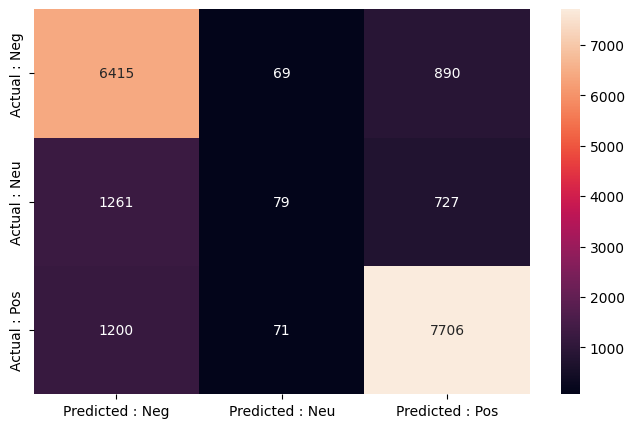

----------------------------------------------------------------------


In [57]:
report(final_xg, model_name="XGBoost", i=7)

- ### LGBM

In [58]:
final_lgbm=Pipeline([("Vect",TfidfVectorizer()),
               ("model",LGBMClassifier())])

In [59]:
final_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.461550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116160
[LightGBM] [Info] Number of data points in the train set: 42975, number of used features: 2031
[LightGBM] [Info] Start training from score -0.906623
[LightGBM] [Info] Start training from score -2.189090
[LightGBM] [Info] Start training from score -0.725473


Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', LGBMClassifier())])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.334004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98896
[LightGBM] [Info] Number of data points in the train set: 34380, number of used features: 1822
[LightGBM] [Info] Start training from score -0.906666
[LightGBM] [Info] Start training from score -2.188883
[LightGBM] [Info] Start training from score -0.725485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.344848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98697
[LightGBM] [Info] Number of data points in the train set: 34380, number of used features: 1813
[LightGBM] [Info] Start training from score -0.906594
[LightGBM] [Info] Start training from score -2.189142
[LightGBM] [Info] 

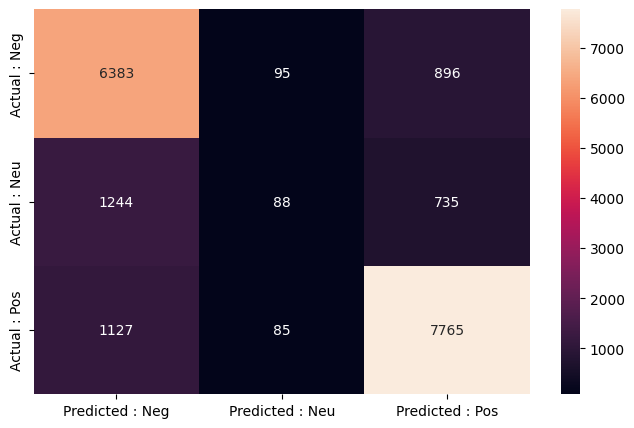

----------------------------------------------------------------------


In [60]:
report(final_lgbm, model_name="LGBM", i=8)

## Conclusion

In [61]:
acc

,Model,Training Accuracy,Testing Accuracy,Cross validation Score
1,Logistic Regression,0.817917,0.784450,0.783037
2,SVM,0.864293,0.774025,0.773962
3,Decision Tree,0.716789,0.687425,0.693217
4,Random Forest,0.715323,0.691280,0.698173
5,Gradient Boosting,0.761047,0.747584,0.749785
6,SGD,0.802746,0.785699,0.786271
7,XGBoost,0.825643,0.770985,0.772309
8,LGBM,0.810355,0.772940,0.775846


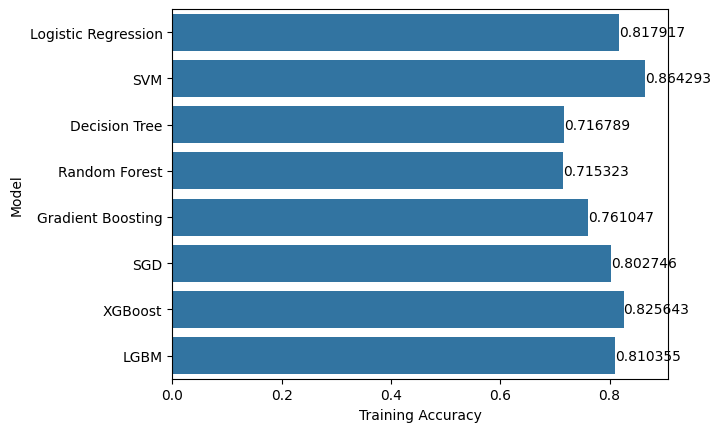

In [62]:
ax=sns.barplot(y='Model',x='Training Accuracy',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that SVM have the highest training accuracy among all the models i.e 0.86_

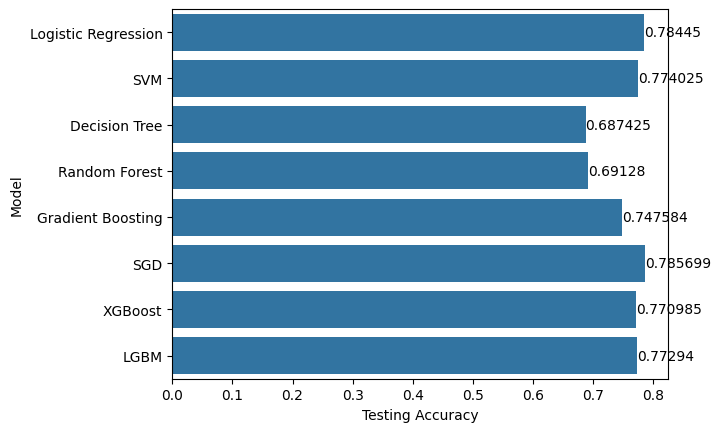

In [63]:
ax=sns.barplot(y='Model',x='Testing Accuracy',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that SGD have the highest testing accuracy among all the models i.e 0.78_

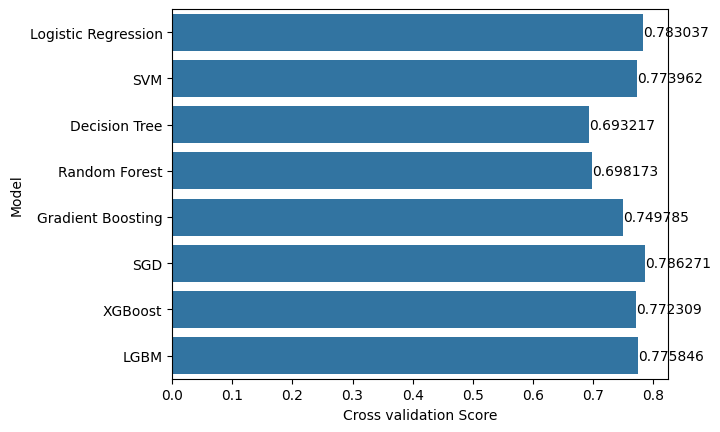

In [64]:
ax=sns.barplot(y='Model',x='Cross validation Score',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that SGD have the highest cross validation score among all the models i.e 0.78_

## Prediction

In [65]:
def predict(sen):
    pred=final_sgd.predict([text_preprocessing(sen)])
    if pred[0]==1 :
        print("NEUTRAL")
    elif pred[0]==2 :
        print("POSITIVE")
    else:
        print("NEGATIVE")

In [66]:
predict("i love spotify app")

POSITIVE


In [67]:
predict("bad app")

NEGATIVE
